In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('전국도서관표준데이터.csv',encoding="EUC-KR")
df=df[['시도명','시군구명','위도','경도']]
df

,시도명,시군구명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
3792,경기도,평택시,36.996152,127.103199
3793,경기도,평택시,37.033340,127.099550
3794,경기도,평택시,37.066155,127.055729
3795,경기도,평택시,36.989362,126.847498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     3797 non-null   object 
 1   시군구명    3797 non-null   object 
 2   위도      3552 non-null   float64
 3   경도      3552 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.8+ KB


In [ ]:
df.isnull().sum()

시도명       0
시군구명      0
위도      245
경도      245
dtype: int64

In [ ]:
df=df.dropna(subset=['위도','경도'])
df

,시도명,시군구명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
3792,경기도,평택시,36.996152,127.103199
3793,경기도,평택시,37.033340,127.099550
3794,경기도,평택시,37.066155,127.055729
3795,경기도,평택시,36.989362,126.847498


In [ ]:
df.rename(columns={'시군구명':"지역명"},inplace=True)
df

C:\Temp\ipykernel_14980\2987627676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'시군구명':"지역명"},inplace=True)


,시도명,지역명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
3792,경기도,평택시,36.996152,127.103199
3793,경기도,평택시,37.033340,127.099550
3794,경기도,평택시,37.066155,127.055729
3795,경기도,평택시,36.989362,126.847498


In [ ]:
df['지역명'].unique()

array(['가평군', '유성구', '성남시', '강동구', '양천구', '오산시', '영천시', '연천군', '속초시',
       '진주시', '중구', '남구', '홍성군', '강진군', '강남구', '없음', '제천시', '경주시', '영덕군',
       '영주시', '포항시', '전주시', '북구', '창원시', '평택시', '달서구', '기장군', '통영시',
       '안산시', '양양군', '해남군', '서초구', '철원군', '동구', '성동구', '사상구', '완주군',
       '은평구', '청주시', '부여군', '강화군', '광명시', '청양군', '태백시', '고창군', '거창군',
       '양산시', '밀양시', '하동군', '함안군', '함양군', '합천군', '서구', '광산구', '화성시',
       '남원시', '포천시', '함평군', '양평군', '광진구', '용인시', '영도구', '김해시', '강서구',
       '칠곡군', '증평군', '계양구', '연수구', '시흥시', '마포구', '서울특별시 도봉구', '음성군',
       '삼척시', '영등포구', '장성군', '노원구\u3000', '수성구', '성주군', '부평구', '부천시',
       '서대문구', '문경시', '안동시', '임실군', '동해시', '제주시', '전주시 덕진구', '군산시', '익산시',
       '정읍시', '동래구', '무안군', '의성군', '달성군', '화천군', '남동구', '산청군', '진안군',
       '양구군', '보은군', '정선군', '화순군', '옥천군', '연제구', '논산시', '구미시', '울주군',
       '구로구', '미추홀구', '상주시', '울릉군', '하남시', '순천시', '진도군', '서귀포시', '군포시',
       '평창군', '목포시', '영광군', '강릉시', '용산구', '파주시', '송파구', '홍천군', '과천시',
       '의정부시'

In [ ]:
df1=pd.read_csv('행정안전부전국명절무료주차장현황20240207.csv')[['시도','시군구','경도','위도']]
df1

,시도,시군구,경도,위도
0,충청북도,청주시,127.484556,36.619338
1,부산광역시,강서구,128.883784,35.153528
2,부산광역시,강서구,128.900069,35.084563
3,부산광역시,강서구,128.979552,35.212102
4,부산광역시,강서구,128.830017,35.011688
...,...,...,...,...
14941,경기,포천시,127.201129,37.889712
14942,경기,성남시,127.152601,37.404132
14943,서울,강남구,127.047060,37.517968
14944,서울,강남구,127.052143,37.515911


In [ ]:
df1['시도'].unique()

array(['충청북도', '부산광역시', '부산', '강원특별자치도', '강원도', '광주광역시', '전라북도',
       '제주특별자치도', '충청남도', '수원시', '인천광역시', '인천', '전라남도', '전남', '경기도',
       '경상남도', '대전광역시', '경남', '경상남도 ', '경북', '경상북도', '울산광역시', '울산',
       '세종특별자치시', '충북', '전북', '대구광역시', '대전', '광주', '서울특별시', '울산시', '경기',
       '서울', '대구', '대구광역시 ', '전북특별자치도', '충남', '충청남도 ', '인천광역시 ', ' 서울특별시'],
      dtype=object)

In [ ]:
df1['시도']=df1['시도'].apply(lambda x:str(x).strip())
df1.rename(columns={'시군구':'지역명','시도':'시도명'},inplace=True)
df1

,시도명,지역명,경도,위도
0,충청북도,청주시,127.484556,36.619338
1,부산광역시,강서구,128.883784,35.153528
2,부산광역시,강서구,128.900069,35.084563
3,부산광역시,강서구,128.979552,35.212102
4,부산광역시,강서구,128.830017,35.011688
...,...,...,...,...
14941,경기,포천시,127.201129,37.889712
14942,경기,성남시,127.152601,37.404132
14943,서울,강남구,127.047060,37.517968
14944,서울,강남구,127.052143,37.515911


In [ ]:
df1.isnull().sum()

시도명     0
지역명    80
경도      1
위도      1
dtype: int64

In [ ]:
df1=df1[~(df1['경도'].isnull()|df1['지역명'].isnull())]
df1

,시도명,지역명,경도,위도
0,충청북도,청주시,127.484556,36.619338
1,부산광역시,강서구,128.883784,35.153528
2,부산광역시,강서구,128.900069,35.084563
3,부산광역시,강서구,128.979552,35.212102
4,부산광역시,강서구,128.830017,35.011688
...,...,...,...,...
14941,경기,포천시,127.201129,37.889712
14942,경기,성남시,127.152601,37.404132
14943,서울,강남구,127.047060,37.517968
14944,서울,강남구,127.052143,37.515911


In [24]:
result=pd.concat([df,df1])
result

,시도명,지역명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
14941,경기,포천시,37.889712,127.201129
14942,경기,성남시,37.404132,127.152601
14943,서울,강남구,37.517968,127.047060
14944,서울,강남구,37.515911,127.052143


In [25]:
result['시도명']=result['시도명'].apply(lambda x:str(x).strip())
result

,시도명,지역명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
14941,경기,포천시,37.889712,127.201129
14942,경기,성남시,37.404132,127.152601
14943,서울,강남구,37.517968,127.047060
14944,서울,강남구,37.515911,127.052143


In [26]:
result['시도명'].unique()

array(['경기도', '대전광역시', '서울특별시', '경상북도', '강원도', '경상남도', '울산광역시', '광주광역시',
       '충청남도', '전라남도', '세종특별자치시', '충청북도', '전북특별자치도', '부산광역시', '대구광역시',
       '강원특별자치도', '인천광역시', '전라북도', '제주특별자치도', '부산', '수원시', '인천', '전남',
       '경남', '경북', '울산', '충북', '전북', '대전', '광주', '울산시', '경기', '서울', '대구',
       '충남'], dtype=object)

In [27]:
region_aliases = {
    '경기도': '경기도',
    '경기': '경기도',
    '서울특별시': '서울특별시',
    '서울': '서울특별시',
    '인천광역시': '인천광역시',
    '인천': '인천광역시',
    '대전광역시': '대전광역시',
    '대전': '대전광역시',
    '광주광역시': '광주광역시',
    '광주': '광주광역시',
    '대구광역시': '대구광역시',
    '대구': '대구광역시',
    '울산광역시': '울산광역시',
    '울산': '울산광역시',
    '울산시': '울산광역시',
    '부산광역시': '부산광역시',
    '부산': '부산광역시',
    '수원시': '수원시',
    '강원도': '강원도',
    '강원특별자치도': '강원특별자치도',
    '충청남도': '충청남도',
    '충남': '충청남도',
    '충청북도': '충청북도',
    '충북': '충청북도',
    '전라남도': '전라남도',
    '전남': '전라남도',
    '전라북도': '전라북도',
    '전북': '전라북도',
    '전북특별자치도': '전북특별자치도',
    '경상남도': '경상남도',
    '경남': '경상남도',
    '경상북도': '경상북도',
    '경북': '경상북도',
    '제주특별자치도': '제주특별자치도',
    '세종특별자치시': '세종특별자치시'
}


In [28]:
result['시도명']=result['시도명'].map(region_aliases)
result

,시도명,지역명,위도,경도
0,경기도,가평군,37.829691,127.506433
1,경기도,가평군,37.683315,127.491015
2,경기도,가평군,37.739591,127.424230
3,경기도,가평군,37.818290,127.352981
4,대전광역시,유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,포천시,37.889712,127.201129
14942,경기도,성남시,37.404132,127.152601
14943,서울특별시,강남구,37.517968,127.047060
14944,서울특별시,강남구,37.515911,127.052143


In [29]:
result['지역명']=result['시도명']+" "+result['지역명']
result

,시도명,지역명,위도,경도
0,경기도,경기도 가평군,37.829691,127.506433
1,경기도,경기도 가평군,37.683315,127.491015
2,경기도,경기도 가평군,37.739591,127.424230
3,경기도,경기도 가평군,37.818290,127.352981
4,대전광역시,대전광역시 유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,경기도 포천시,37.889712,127.201129
14942,경기도,경기도 성남시,37.404132,127.152601
14943,서울특별시,서울특별시 강남구,37.517968,127.047060
14944,서울특별시,서울특별시 강남구,37.515911,127.052143


In [30]:
result['지역명'].unique()

array(['경기도 가평군', '대전광역시 유성구', '경기도 성남시', '서울특별시 강동구', '서울특별시 양천구',
       '경기도 오산시', '경상북도 영천시', '경기도 연천군', '강원도 속초시', '경상남도 진주시',
       '울산광역시 중구', '광주광역시 남구', '충청남도 홍성군', '전라남도 강진군', '서울특별시 강남구',
       '세종특별자치시 없음', '충청북도 제천시', '경상북도 경주시', '경상북도 영덕군', '경상북도 영주시',
       '경상북도 포항시', '전북특별자치도 전주시', '부산광역시 북구', '경상남도 창원시', '경기도 평택시',
       '대구광역시 달서구', '울산광역시 남구', '부산광역시 기장군', '경상남도 통영시', '광주광역시 북구',
       '경기도 안산시', '강원특별자치도 양양군', '전라남도 해남군', '서울특별시 서초구', '강원특별자치도 철원군',
       '대전광역시 동구', '서울특별시 성동구', '부산광역시 사상구', '전북특별자치도 완주군', '서울특별시 은평구',
       '대구광역시 중구', '충청북도 청주시', '충청남도 부여군', '인천광역시 강화군', '경기도 광명시',
       '충청남도 청양군', '강원도 태백시', '전라북도 고창군', '대구광역시 동구', '경상남도 거창군',
       '경상남도 양산시', '경상남도 밀양시', '경상남도 하동군', '경상남도 함안군', '경상남도 함양군',
       '경상남도 합천군', '광주광역시 동구', '광주광역시 서구', '광주광역시 광산구', '경기도 화성시',
       '강원도 철원군', '전라북도 남원시', '경기도 포천시', '전라남도 함평군', '강원도 양양군', '경기도 양평군',
       '서울특별시 광진구', '경기도 용인시', '부산광역시 영도구', '경상남도 김해시', '서울특별시 강서구',
       '대구광역시 북구', '경상북도 칠곡군', '충청북도

In [31]:
result['지역명']=result['지역명'].str.strip()
result

,시도명,지역명,위도,경도
0,경기도,경기도 가평군,37.829691,127.506433
1,경기도,경기도 가평군,37.683315,127.491015
2,경기도,경기도 가평군,37.739591,127.424230
3,경기도,경기도 가평군,37.818290,127.352981
4,대전광역시,대전광역시 유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,경기도 포천시,37.889712,127.201129
14942,경기도,경기도 성남시,37.404132,127.152601
14943,서울특별시,서울특별시 강남구,37.517968,127.047060
14944,서울특별시,서울특별시 강남구,37.515911,127.052143


In [32]:
result=result[result['지역명']!='세종특별자치시 없음']
result

,시도명,지역명,위도,경도
0,경기도,경기도 가평군,37.829691,127.506433
1,경기도,경기도 가평군,37.683315,127.491015
2,경기도,경기도 가평군,37.739591,127.424230
3,경기도,경기도 가평군,37.818290,127.352981
4,대전광역시,대전광역시 유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,경기도 포천시,37.889712,127.201129
14942,경기도,경기도 성남시,37.404132,127.152601
14943,서울특별시,서울특별시 강남구,37.517968,127.047060
14944,서울특별시,서울특별시 강남구,37.515911,127.052143


In [33]:
result['지역명'].unique()

array(['경기도 가평군', '대전광역시 유성구', '경기도 성남시', '서울특별시 강동구', '서울특별시 양천구',
       '경기도 오산시', '경상북도 영천시', '경기도 연천군', '강원도 속초시', '경상남도 진주시',
       '울산광역시 중구', '광주광역시 남구', '충청남도 홍성군', '전라남도 강진군', '서울특별시 강남구',
       '충청북도 제천시', '경상북도 경주시', '경상북도 영덕군', '경상북도 영주시', '경상북도 포항시',
       '전북특별자치도 전주시', '부산광역시 북구', '경상남도 창원시', '경기도 평택시', '대구광역시 달서구',
       '울산광역시 남구', '부산광역시 기장군', '경상남도 통영시', '광주광역시 북구', '경기도 안산시',
       '강원특별자치도 양양군', '전라남도 해남군', '서울특별시 서초구', '강원특별자치도 철원군', '대전광역시 동구',
       '서울특별시 성동구', '부산광역시 사상구', '전북특별자치도 완주군', '서울특별시 은평구', '대구광역시 중구',
       '충청북도 청주시', '충청남도 부여군', '인천광역시 강화군', '경기도 광명시', '충청남도 청양군',
       '강원도 태백시', '전라북도 고창군', '대구광역시 동구', '경상남도 거창군', '경상남도 양산시',
       '경상남도 밀양시', '경상남도 하동군', '경상남도 함안군', '경상남도 함양군', '경상남도 합천군',
       '광주광역시 동구', '광주광역시 서구', '광주광역시 광산구', '경기도 화성시', '강원도 철원군',
       '전라북도 남원시', '경기도 포천시', '전라남도 함평군', '강원도 양양군', '경기도 양평군',
       '서울특별시 광진구', '경기도 용인시', '부산광역시 영도구', '경상남도 김해시', '서울특별시 강서구',
       '대구광역시 북구', '경상북도 칠곡군', '충청북도 증평군', '인천광역시 

In [34]:
result=result[result['지역명']!='수원시 수원시']
result

,시도명,지역명,위도,경도
0,경기도,경기도 가평군,37.829691,127.506433
1,경기도,경기도 가평군,37.683315,127.491015
2,경기도,경기도 가평군,37.739591,127.424230
3,경기도,경기도 가평군,37.818290,127.352981
4,대전광역시,대전광역시 유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,경기도 포천시,37.889712,127.201129
14942,경기도,경기도 성남시,37.404132,127.152601
14943,서울특별시,서울특별시 강남구,37.517968,127.047060
14944,서울특별시,서울특별시 강남구,37.515911,127.052143


In [37]:
result.select_dtypes('number').corr()

,위도,경도
위도,1.000000,-0.502578
경도,-0.502578,1.000000


In [36]:
result['시도명'].unique()

array(['경기도', '대전광역시', '서울특별시', '경상북도', '강원도', '경상남도', '울산광역시', '광주광역시',
       '충청남도', '전라남도', '충청북도', '전북특별자치도', '부산광역시', '대구광역시', '강원특별자치도',
       '인천광역시', '전라북도', '제주특별자치도', '세종특별자치시'], dtype=object)

In [39]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18394 entries, 0 to 14945
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     18394 non-null  object 
 1   지역명     18394 non-null  object 
 2   위도      18394 non-null  float64
 3   경도      18394 non-null  float64
dtypes: float64(2), object(2)
memory usage: 718.5+ KB


# 이상치가 있는지 없는지 직관적으로 본다

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, '')

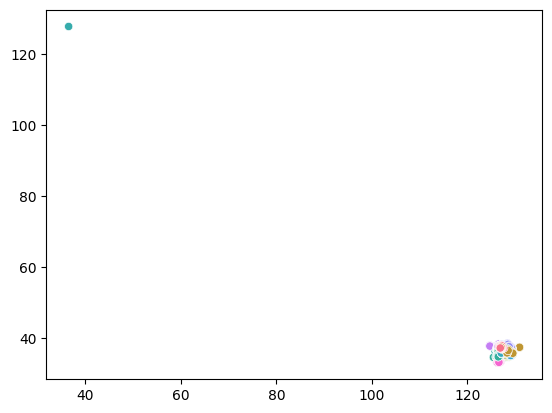

In [43]:
sns.scatterplot(data=result,x=result['경도'],y=result['위도'],hue=result['시도명']).get_legend().remove()
plt.xlabel("")
plt.ylabel("")

# 위도가 120이상인 데이터를 지운다

In [45]:
result=result[result['위도']<120]
result

,시도명,지역명,위도,경도
0,경기도,경기도 가평군,37.829691,127.506433
1,경기도,경기도 가평군,37.683315,127.491015
2,경기도,경기도 가평군,37.739591,127.424230
3,경기도,경기도 가평군,37.818290,127.352981
4,대전광역시,대전광역시 유성구,36.349268,127.330255
...,...,...,...,...
14941,경기도,경기도 포천시,37.889712,127.201129
14942,경기도,경기도 성남시,37.404132,127.152601
14943,서울특별시,서울특별시 강남구,37.517968,127.047060
14944,서울특별시,서울특별시 강남구,37.515911,127.052143


Text(0, 0.5, '')

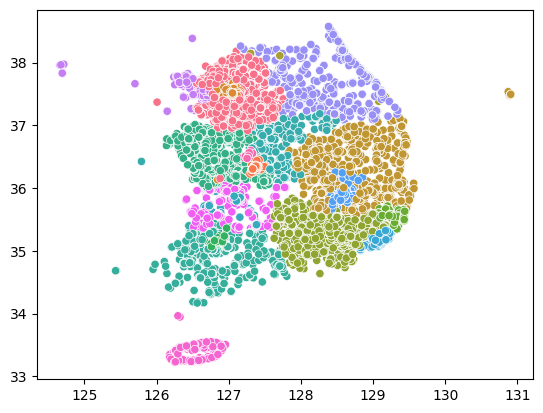

In [46]:
sns.scatterplot(data=result,x=result['경도'],y=result['위도'],hue=result['시도명']).get_legend().remove()
plt.xlabel("")
plt.ylabel("")

In [47]:
result.to_csv('data.csv',index=False)